<a href="https://colab.research.google.com/github/DevJaepaL/OpenCV/blob/main/%EC%97%B0%EC%8A%B53_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

연습 3-12 영상 마스킹 및 가중치 결합

1. 영상 불러오기, 채널 분리하기, 출력배열 초기화, 포화함수 생성하기

In [19]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena.jpg')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/lena-mask.bmp')

# BGR채널순서를 RGB채널로 변경
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
output_img = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) 

# RGB 채널 나누기
R_img1,G_img1,B_img1=cv2.split(RGB_img1)
R_img2,G_img2,B_img2=cv2.split(RGB_img2)

# 출력 array 생성하고 0으로 초기화, unsigned byte (0~255)로 설정
R_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0],RGB_img1.shape[1]),dtype=np.ubyte)

#saturation함수로 정의하기
def saturation(value): 
    if(value>255):
       value = 255;
    return value 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2. 영상 임계값 적용하기, 마스크 영상 이진화

In [20]:
#1) 영상 임계값 적용 하기
for h in range(RGB_img2.shape[0]):
  for w in range(RGB_img2.shape[1]):
    if(np.int32(R_img2[h,w])<=0):
      R_img2[h,w] = G_img2[h,w] = B_img2[h,w] = 255
    else:
      R_img2[h,w] = G_img2[h,w] = B_img2[h,w] = 0

3. 원영상과 AND 비트 연산하기

In [15]:
#2) 원 영상과 AND 비트 연산하기
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = saturation(np.int32(R_img1[h,w]) & np.int32(R_img2[h,w]))
    G_plus[h,w] = saturation(np.int32(G_img1[h,w]) & np.int32(G_img2[h,w]))
    B_plus[h,w] = saturation(np.int32(B_img1[h,w]) & np.int32(B_img2[h,w]))

4. 두영상간의 가중치 결합하기

In [24]:
#3) 두 영상간의 가중치 결합하기
W = 0.3
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w] = saturation(W*np.float32(R_img1[h,w]) + (1-W)*np.float32(R_plus[h,w]))
    G_plus[h,w] = saturation(W*np.float32(G_img1[h,w]) + (1-W)*np.float32(G_plus[h,w]))
    B_plus[h,w] = saturation(W*np.float32(B_img1[h,w]) + (1-W)*np.float32(B_plus[h,w]))

5. 원 영상 복원하기

In [22]:
#영상 다시 넣어주기  
RGB_img1[:,:,0] = R_img1
RGB_img1[:,:,1] = G_img1
RGB_img1[:,:,2] = B_img1  
RGB_img2[:,:,0] = R_img2
RGB_img2[:,:,1] = G_img2
RGB_img2[:,:,2] = B_img2  

6. 화면 출력

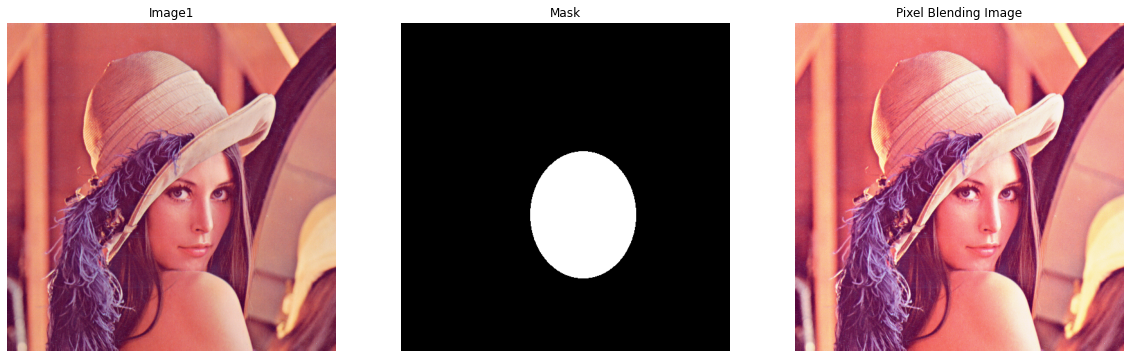

In [25]:
#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(1,3,1)# 1행 3열에서 1번째 열 plt.title("First image")
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")
plt.subplot(1,3,2)# 1행 3열에서 1번째 열 plt.title("First image")
plt.title("Mask")
plt.imshow(RGB_img2)
plt.axis("off")
plt.subplot(1,3,3)# 1행 3열에서 2번째 열
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("Pixel Blending Image")
plt.imshow(output_img)
plt.axis("off")
plt.show()